In [ ]:
# Language: Python

# Compressive Strength of Concrete 

---

## 1) Project Topic

**Explanation:** Concrete is highly necessary for construction and its strength depends on many factors, such as its ingredients and age. This project will explore different combinations of the quantity of ingredients and age to determine the compressive strength of concrete. 

**Type of Problem:** This is a regression problem because the output value is the concrete compressive strength, which is of type numerical - continuous. 

**Goal:** The primary goal of this project is to predict the compressive strength of concrete. Various factors contribute towards the concrete compressive strength and these factors are included in the dataset as input values, while the output value is the strength. 

---

##  2) Data

**Data Source:** Yeh, I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

**Explanation:** 
* The dataset is in a MS Excel file, with 8 input values and 1 output value. 
* The input values are: cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate and age. 
* The dataset uses the input values to determine the output, which is the compressive strength of concrete, that was determined in a lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
#create a dataframe of the concrete dataset 
df = pd.read_excel('Concrete_Data.xls')

In [3]:
#display dataframe
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
#display data statistics
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
#display info about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

### Analysis: ### 

* There are 1030 samples (rows) and 9 features (columns). 
* The table below displays each feature's data type and indicates whether it is an input or output: 

| Features  | Data Type  | Input/Output  |
|---|---|---|
| Cement (component 1)(kg in a m^3 mixture)  | Numeric - Continuous  | Input  |
| Blast Furnace Slag (component 2)(kg in a m^3 mixture)  | Numeric - Continuous  | Input  |
| Fly Ash (component 3)(kg in a m^3 mixture)  | Numeric - Continuous  | Input  |
| Water  (component 4)(kg in a m^3 mixture)  | Numeric - Continuous  | Input  |
| Superplasticizer (component 5)(kg in a m^3 mixture)  | Numeric - Continuous  | Input  |
| Coarse Aggregate  (component 6)(kg in a m^3 mixture)  | Numeric - Continuous  | Input  |
| Fine Aggregate (component 7)(kg in a m^3 mixture)  | Numeric - Continuous  | Input  |
| Age (day)  | Numeric - Discrete  | Input  |
| Concrete compressive strength(MPa, megapascals)  | Numeric - Continuous  | Output  | 

---

## 3) Data Cleaning

In [6]:
#create a dictionary of dataset column names with new column names 
header = {'Cement (component 1)(kg in a m^3 mixture)' : 'Cement', 
          'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'BlastFurnaceSlag', 
          'Fly Ash (component 3)(kg in a m^3 mixture)' : 'FlyAsh', 
          'Water  (component 4)(kg in a m^3 mixture)' : 'Water', 
          'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer', 
          'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'CourseAggregate', 
          'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'FineAggregate', 
          'Age (day)' : 'Age', 
          'Concrete compressive strength(MPa, megapascals) ' : 'ConcreteCompressiveStrength'}

#rename column names so that they are smaller and easier to work with 
df = df.rename(columns = header)

#display dataframe
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CourseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
#determine number of missing/NaN values in the dataset
df.isnull().sum()

Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CourseAggregate                0
FineAggregate                  0
Age                            0
ConcreteCompressiveStrength    0
dtype: int64

### Analysis: ###

* Renamed feature/column names because the original column names included the component number and units. This would make it difficult to work with the column names in the future. The new column names are simpler to work with but still understandable. For example, 'Cement (component 1)(kg in a m^3 mixture)' was changed to 'Cement'. 
* There are no missing/NaN values in the dataset as indicated by using df.isnull().sum() above. So there is no reason to remove a feature/column or impute any values. 
* I am not an expert in the field of concrete, so I didn't remove any input features based on whether they would be invaluable to the final outcome, which is the concrete compressive strength. 
* After plotting boxplots, it was determined that there were many outliers present in the dataset. Therefore, the samples/rows with the outliers were removed from the dataframe in the Exploratory Data Analysis section. 

---

## 4) Exploratory Data Analysis: 

In [8]:
#create a list of column names
columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
           'CourseAggregate', 'FineAggregate', 'Age', 'ConcreteCompressiveStrength']; 

In [9]:
#create a list of columns' units 
units = ['(kg in a m^3 mixture)', '(kg in a m^3 mixture)', '(kg in a m^3 mixture)', 
         '(kg in a m^3 mixture)', '(kg in a m^3 mixture)', '(kg in a m^3 mixture)', 
         '(kg in a m^3 mixture)', '(day)', '(MPa, megapascals)']

---

### A) Boxplots

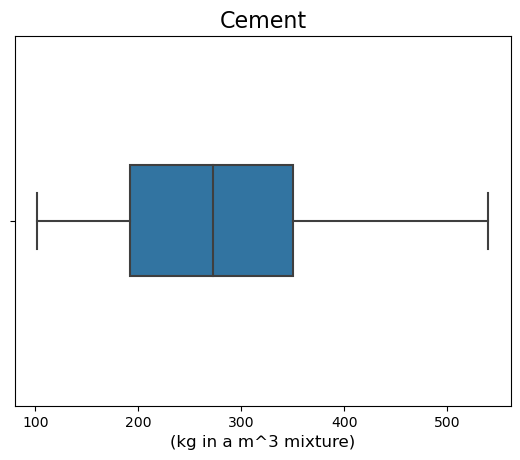

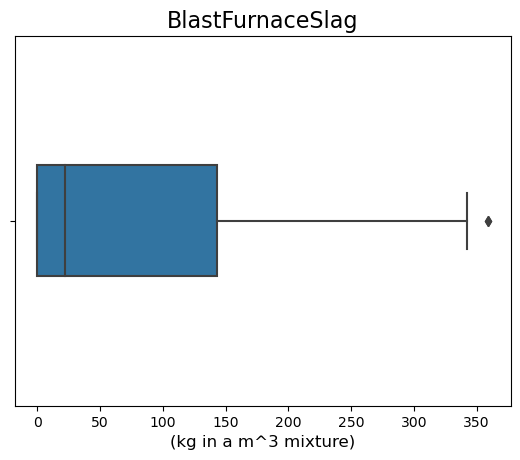

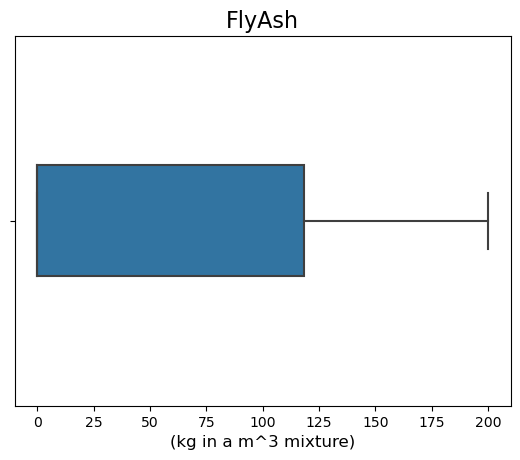

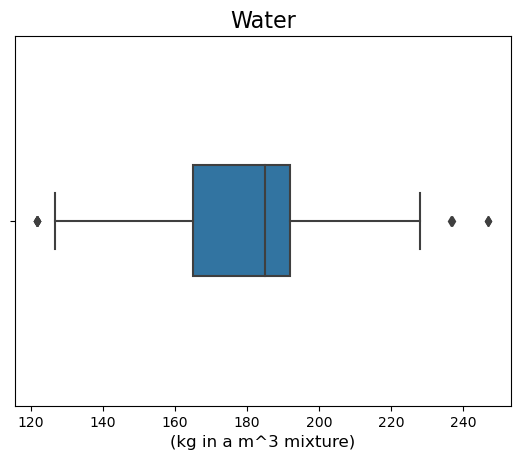

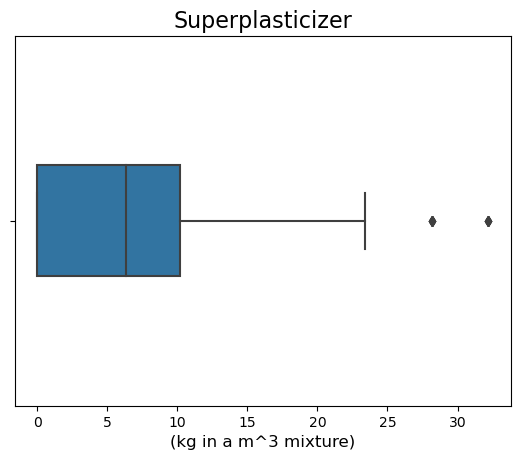

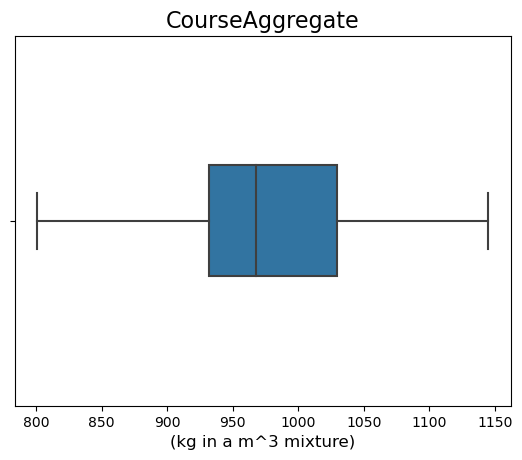

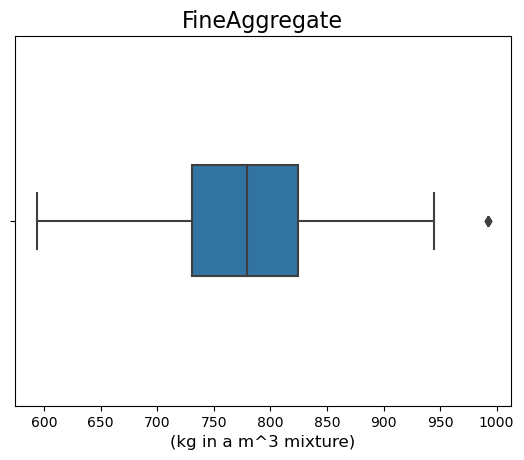

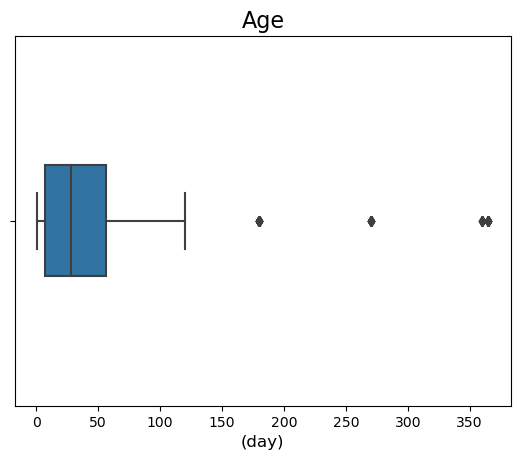

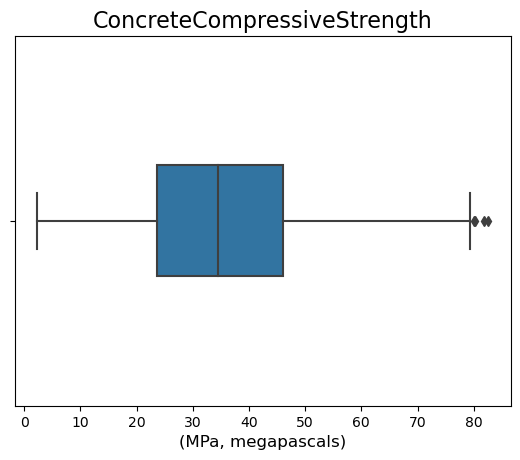

In [10]:
#create a function to plot a boxplot 
def boxplot(column, unit, df):
    sns.boxplot(x=df[column], width=0.3);
    plt.title(column, fontsize=16)
    plt.xlabel(unit, fontsize=12)
    plt.show();
    
#loop through all columns and plot boxplots
for i in range(len(columns)):
    boxplot(columns[i], units[i], df)

### Analysis of Boxplots: ###

* The boxplot for each feature shows the median, that is the amount of the ingredient or age that most appeared in the dataset (as indicated by the vertical line in the box). 
* Outliers are present beyond the whiskers of the boxplot for the following features: blast furnace slag, water, superplasticizer, fine aggregate, age, and concrete compressive strength. The samples/rows that contain these outliers will be removed from the dataframe. 

---

### B) Histograms

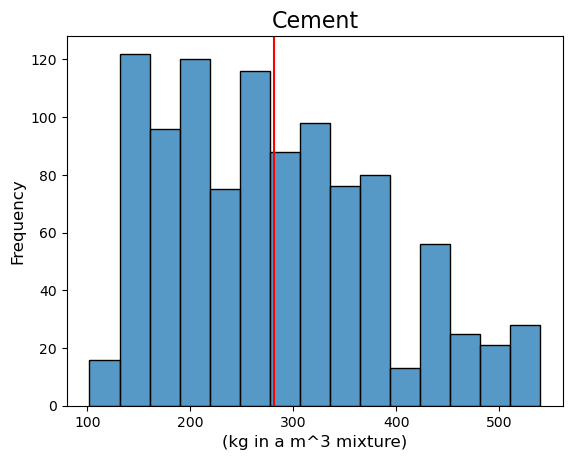

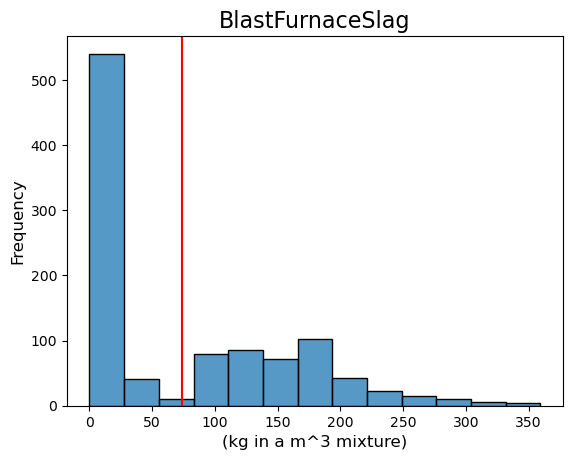

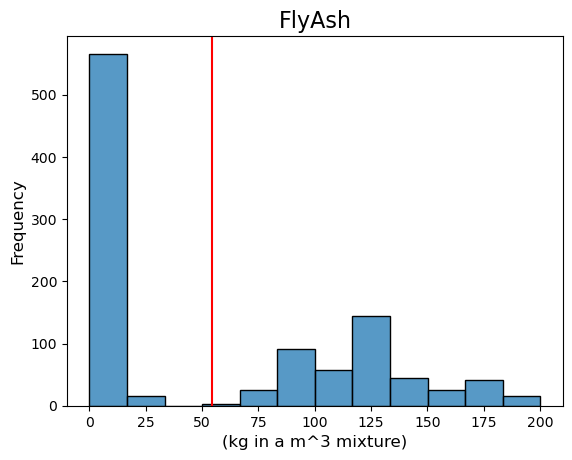

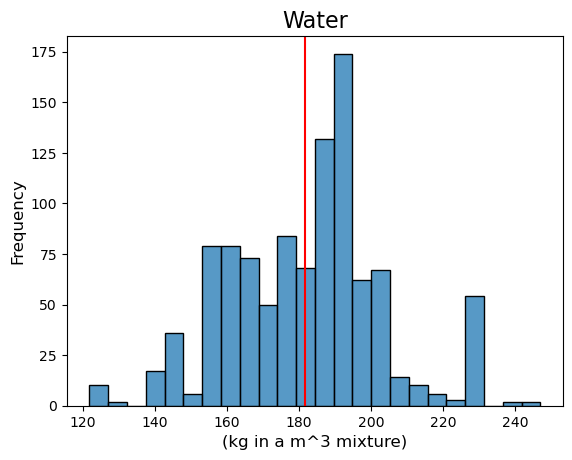

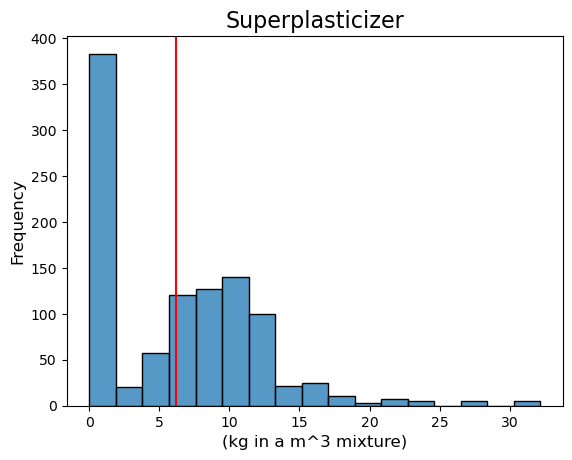

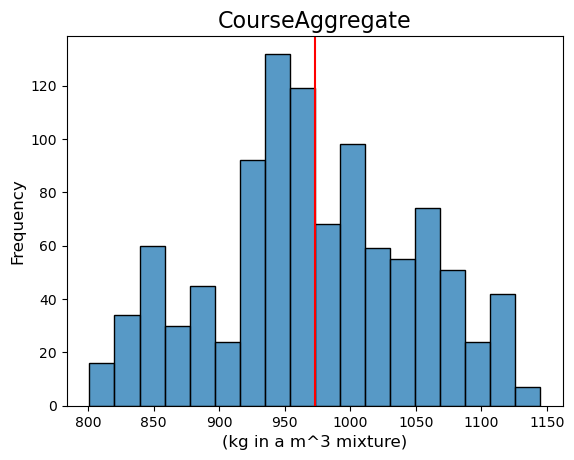

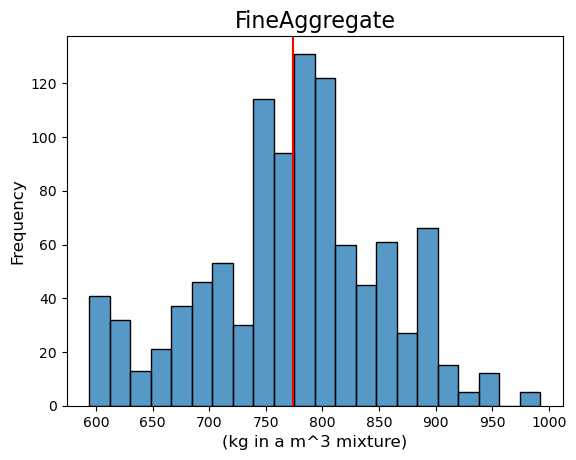

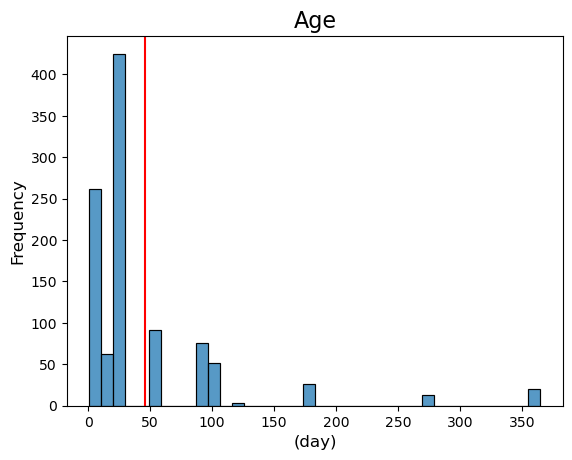

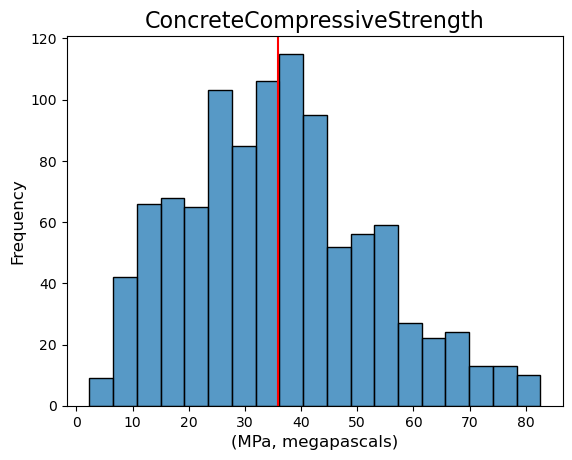

In [11]:
#create a function to plot a histogram
def histogram(column, unit, df):
    sns.histplot(df[column])
    plt.title(column, fontsize=16)
    plt.xlabel(unit, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    mean = df[column].mean()
    plt.axvline(mean, color='red'); #plot mean 
    plt.show();
    
#loop through all columns and plot histograms 
for i in range(len(columns)):
    histogram(columns[i], units[i], df)

### Analysis of Histograms: ###

* The histogram plot for each feature shows its mean (as indicated by the red vertical line). 
* The graphs follow different probability distributions and modalities. 
* The graphs show that the following features are right skewed: cement, blast furnace slag, fly ash, superplasticizer, age & concrete compressive strength. The output (concrete compressive strength) may be right skewed because a majority of the input features (5/8) are right skewed, which makes sense because the concrete compressive strength is correlated to the input features. 

---

### C) Correlation Matrix

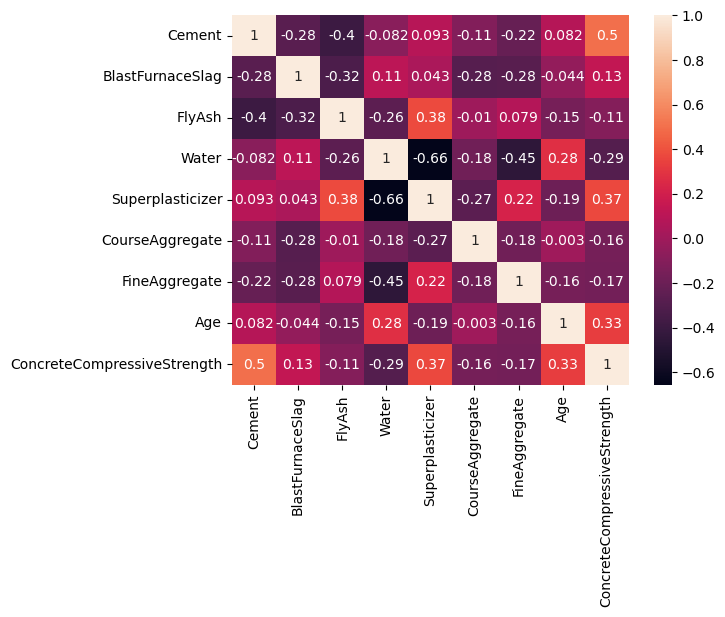

In [12]:
#create a correlation matrix for the dataset
sns.heatmap(df.corr(), annot=True)
plt.show()

### Analysis of Correlation Matrix: ###

* A correlation of 1 indicates perfect correlation, while a correlation of 0 indicates no correlation. The diagonal values in the matrix are 1 because its a feature being correlated with itself. There are a lot of correlations that are close to 0. 
* Positive values indicate a positive correlation while negative values indicate a negative correlation. Concrete compressive strength is positively correlated with cement, blast furnace slag, superplasticizer, and age. It is negatively correlated with fly ash, water, course aggregate, and fine aggregate. 
* There are no strong correlations between any factors, but there are a lot of weak correlations.  
* The first highest correlation is moderate (0.5) and its between cement and concrete compressive strength.
* The second highest correlation is weak (0.38) and its between fly ash and superplasticizer. 

---

### D) Removal of Outliers ###

The boxplots showed many outliers that are present in the dataset. This can skew the data considerably. Therefore, it is important to remove them from the data. 

In [13]:
#calculate lower and upper bound of blast furnace slag
Q1 = df['BlastFurnaceSlag'].quantile(0.25)
Q3 = df['BlastFurnaceSlag'].quantile(0.75)
IQR = Q3 - Q1
lower_bfs = Q1 - 1.5*IQR
upper_bfs = Q3 + 1.5*IQR
print("Blast Furnace Slag - lower bound:", lower_bfs)
print("Blast Furnace Slag - upper bound:", upper_bfs)

Blast Furnace Slag - lower bound: -214.42499999999998
Blast Furnace Slag - upper bound: 357.375


In [14]:
#calculate lower and upper bound of water
Q1 = df['Water'].quantile(0.25)
Q3 = df['Water'].quantile(0.75)
IQR = Q3 - Q1
lower_w = Q1 - 1.5*IQR
upper_w = Q3 + 1.5*IQR
print("Water - lower bound:", lower_w)
print("Water - upper bound:", upper_w)

Water - lower bound: 124.25000000000001
Water - upper bound: 232.64999999999998


In [15]:
#calculate lower and upper bound of superplasticizer
Q1 = df['Superplasticizer'].quantile(0.25)
Q3 = df['Superplasticizer'].quantile(0.75)
IQR = Q3 - Q1
lower_s = Q1 - 1.5*IQR
upper_s = Q3 + 1.5*IQR
print("Superplasticizer - lower bound:", lower_s)
print("Superplasticizer - upper bound:", upper_s)

Superplasticizer - lower bound: -15.24
Superplasticizer - upper bound: 25.4


In [16]:
#calculate lower and upper bound of fine aggregate
Q1 = df['FineAggregate'].quantile(0.25)
Q3 = df['FineAggregate'].quantile(0.75)
IQR = Q3 - Q1
lower_fa = Q1 - 1.5*IQR
upper_fa = Q3 + 1.5*IQR
print("Fine Aggregate - lower bound:", lower_fa)
print("Fine Aggregate - upper bound:", upper_fa)

Fine Aggregate - lower bound: 591.3750000000001
Fine Aggregate - upper bound: 963.5749999999999


In [17]:
#calculate lower and upper bound of age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_age = Q1 - 1.5*IQR
upper_age = Q3 + 1.5*IQR
print("Age - lower bound:", lower_age)
print("Age - upper bound:", upper_age)

Age - lower bound: -66.5
Age - upper bound: 129.5


In [18]:
#calculate lower and upper bound of concrete compressive strength
Q1 = df['ConcreteCompressiveStrength'].quantile(0.25)
Q3 = df['ConcreteCompressiveStrength'].quantile(0.75)
IQR = Q3 - Q1
lower_ccs = Q1 - 1.5*IQR
upper_ccs = Q3 + 1.5*IQR
print("Concrete Compressive Strength - lower bound:", lower_ccs)
print("Concrete Compressive Strength - upper bound:", upper_ccs)

Concrete Compressive Strength - lower bound: -9.936641927500002
Concrete Compressive Strength - upper bound: 79.78004362050001


In [19]:
#determine outliers based on the boxplots & use upper and lower bounds to detect them 
outliers = df.loc[
          (df['BlastFurnaceSlag'] < lower_bfs) | (df['BlastFurnaceSlag'] > upper_bfs) | 
          (df['Water'] < lower_w) | (df['Water'] > upper_w) |
          (df['Superplasticizer'] < lower_s) | (df['Superplasticizer'] > upper_s) | 
          (df['FineAggregate'] < lower_fa) | (df['FineAggregate'] > upper_fa) |
          (df['Age'] < lower_age) | (df['Age'] > upper_age) | 
          (df['ConcreteCompressiveStrength'] < lower_ccs) | (df['ConcreteCompressiveStrength'] > upper_ccs)] 

#print a list of the outliers that will be removed from the dataframe
display(outliers)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CourseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
...,...,...,...,...,...,...,...,...,...
823,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.585415
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.225329
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.627044
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.629801


In [20]:
#remove outliers from the dataframe 
df = df.drop(list(outliers.index))

#display new df without outliers
display(df)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CourseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Analysis of Outliers: ###

* The features/columns that the outliers were present in was detected by observing the boxplots and then using the lower and upper bounds of each feature to determine any outliers that were present there, and then removing those samples/rows from the dataframe.  
* There were 89 samples/rows that were removed. 
* Initially, the dataset contained 1030 samples/rows but by removing 89, the final number is 941. 

---

### E) Conclusion of Data Cleaning & EDA: ###

* There were no missing/NaN values in the dataset so none of the features/columns were removed. 
* Outliers in the data may be related to the skewness of the histograms. For example, here are outliers present in the features that also display skewness: blast furnace slag, superplasticizer, age, and concrete compressive strength. 
* Since there are outliers present in the dataset (as seen in the boxplots), the corresponding samples/rows (89) were removed.
* The correlation matrix displayed no strong correlation being present among the different features. 

---

## 5) Model Approach ##

**Models:** 

* Linear regression model will be used to predict the concrete compressive strength because the data type of the output variable is numeric - continuous. First, simple linear regression was used to fit the data but it wasn't a good fit. Next, multi-linear regression was used to fit the data, which was a better fit than simple linear regression.

* Classification model can't be used with this dataset because the data type of the output variable would need to be discrete/categorical. 

---

## 6) Simple Linear Regression ##

### A) OLS Regression Table ###

In [21]:
#determine the independent variables 
independent_variables = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CourseAggregate', 'FineAggregate', 'Age']

#print the OLS Regression Table by looping through the independent variables
for variable in independent_variables:
    #create a simple linear regression model of variable
    linear_model = smf.ols(formula=f'ConcreteCompressiveStrength~{variable}', data=df).fit()
    #print the title of the table
    print(f"Independent Variable: {variable}")
    #print the model summary 
    print(linear_model.summary())
    print("------------------------------------------------------------------")
    print("")

Independent Variable: Cement
                                 OLS Regression Results                                
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.227
Model:                                     OLS   Adj. R-squared:                  0.226
Method:                          Least Squares   F-statistic:                     276.2
Date:                         Wed, 09 Aug 2023   Prob (F-statistic):           1.43e-54
Time:                                 03:06:04   Log-Likelihood:                -3856.6
No. Observations:                          941   AIC:                             7717.
Df Residuals:                              939   BIC:                             7727.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

### Analysis of OLS Regression Table: ###

* The confidence interval (-0.031, 0.002) passes through 0 for fly ash, which means that there is no correlation between concrete compressive strength and fly ash. 
* The highest R-squared value is for age, 0.268. The p-value is 0. This means that there is a relationship between concrete compressive strength & age.
* The second highest R-squared value is for cement, 0.227. The p-value is 0. This means that there is a relationship between concrete compressive strength & cement. 
* The R-squared value is used to determine how well a model fits the data. If the R-squared value is close to 1, then the model fits the data well. 
* Since the highest R-squared value is 0.268, we can conclude that the simple linear regression model doesn't fit the data well. 

---

### B) Regression Plots with Confidence Interval ###

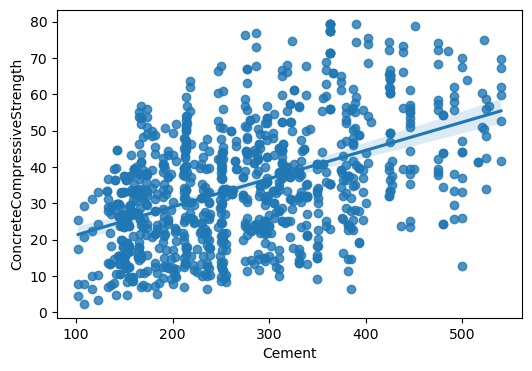

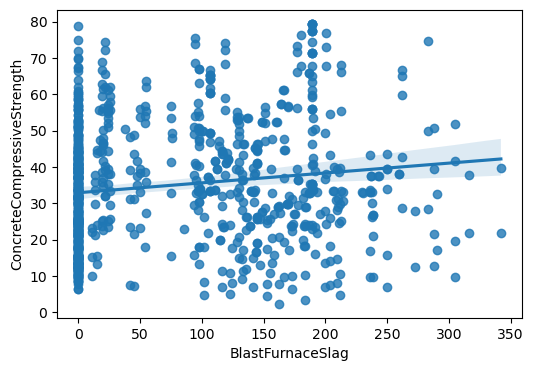

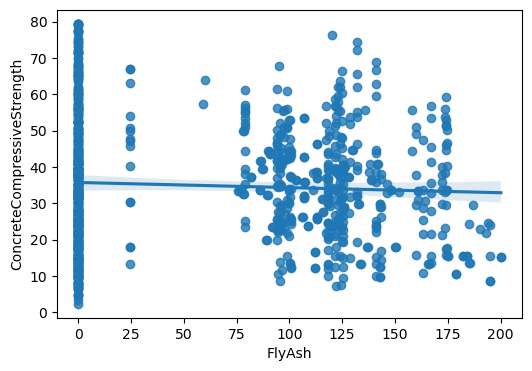

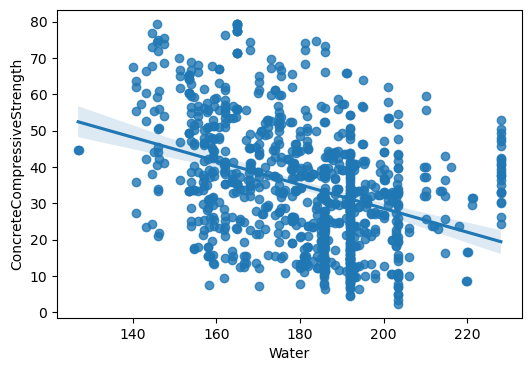

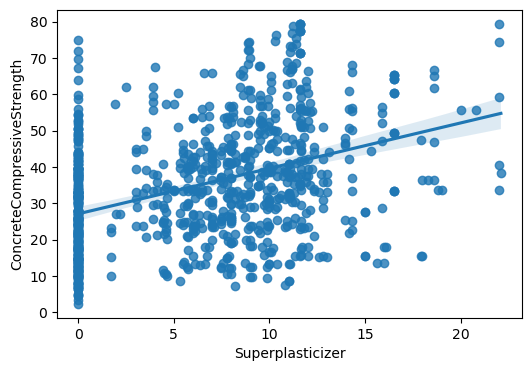

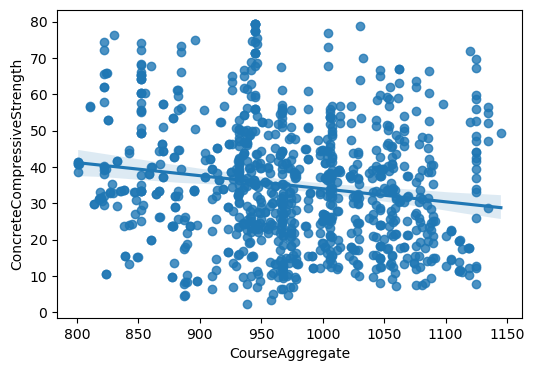

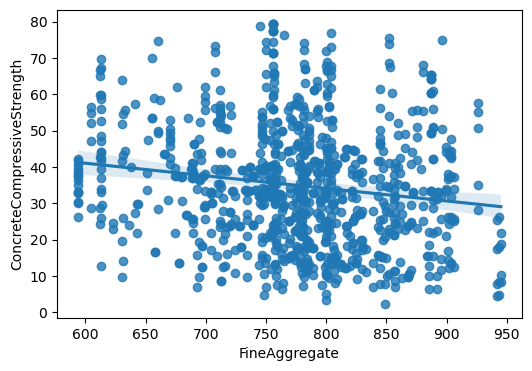

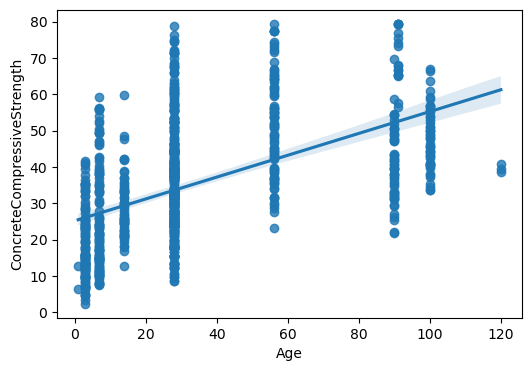

In [22]:
#plot regression plot with confidence intervals by looping through the independent variables
for variable in independent_variables: 
    plt.figure(figsize=(6,4))
    sns.regplot(x=df[variable], y=df['ConcreteCompressiveStrength'], data=df, ci=99);

### Analysis of Regression Plots: ###

* The above plots represent the independent variable vs the concrete compressive strength data points, along with the regression line and the confidence interval (shaded region). 
* For the first plot of cement vs concrete compressive strength, the confidence interval is wider at the end than the middle. This occurs because near the ends, there is less data available so the confidence is less. 

---

### C) Residual QQ Plot ###

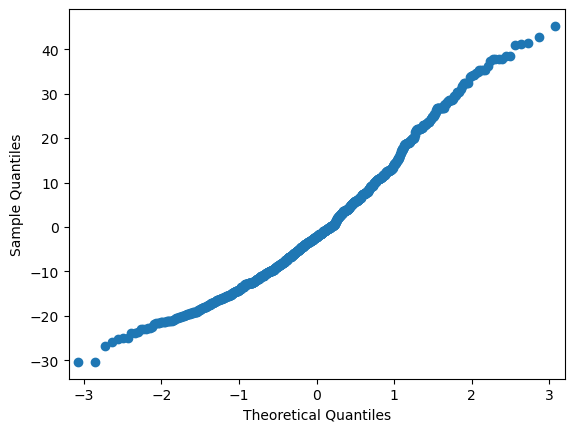

In [23]:
#plot the QQ plot
sm.qqplot(linear_model.resid);

### Analysis of Residual QQ Plot: ###

* In the residual QQ plot of the simple linear regression model, the residuals are normally distributed if they follow a diagonal line, which means that there will be less errors in the model. 
* In the above plot, the residuals do not follow a diagonal line, which means that they are not normally distributed and this will result in errors occuring in the model. 

---

### D) Leverage Plot ###

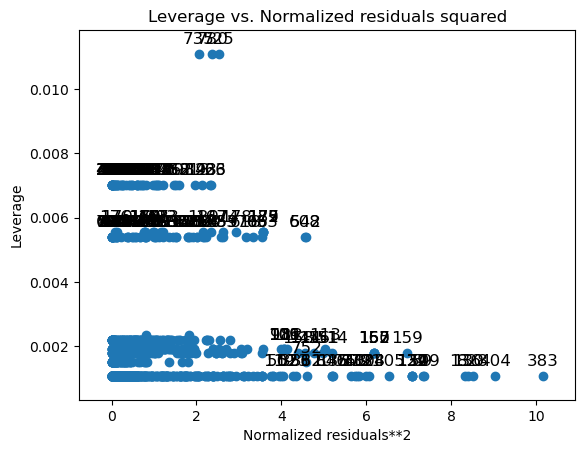

In [24]:
#plot the leverage plot
sm.graphics.plot_leverage_resid2(linear_model, alpha=0.05);

---

### E) Conlusion of Simple Linear Regression: ###

* The OLS Regression Table and Residual QQ Plot determined that the simple linear regression model doesn't fit this dataset well. 
* Due to this, the multi-linear regression model will be fit to the dataset below. 

---

## 7) Multi-Linear Regression ##

### A) OLS Regression Table ### 

In [25]:
#create the multi-linear regression model with no interactions using the concrete dataset
multi_linear_model = smf.ols(formula='ConcreteCompressiveStrength~Cement+BlastFurnaceSlag+FlyAsh+Water+Superplasticizer+CourseAggregate+FineAggregate+Age', data=df).fit()
#print the summary of the model
multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.770
Model:                                     OLS   Adj. R-squared:                  0.768
Method:                          Least Squares   F-statistic:                     390.0
Date:                         Wed, 09 Aug 2023   Prob (F-statistic):          2.92e-291
Time:                                 03:06:08   Log-Likelihood:                -3286.5
No. Observations:                          941   AIC:                             6591.
Df Residuals:                              932   BIC:                             6635.
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           49.9873     22.409      2.231      0.026       6.010      93.964
Cement               0.1020      0.007     14.655      0.000       0.088       0.116
BlastFurnaceSlag     0.0755      0.008      8.982      0.000       0.059       0.092
FlyAsh               0.0482      0.010      4.667      0.000       0.028       0.068
Water               -0.2496      0.035     -7.161      0.000      -0.318      -0.181
Superplasticizer     0.2160      0.085      2.535      0.011       0.049       0.383
CourseAggregate     -0.0103      0.008     -1.311      0.190      -0.026       0.005
FineAggregate       -0.0103      0.009     -1.152      0.250      -0.028       0.007
Age                  0.3127      0.009     34.065      0.000       0.295       0.331
==============================================================================
Omnibus:                        8.746   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.120
Skew:                           0.147   Prob(JB):                      0.00635
Kurtosis:                       3.414   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis of OLS Regression Table: ###

* The R-squared value of the multi-linear regression model is 0.770, which is already better than the highest R-squared value of the linear regression models. 
* The confidence intervals of course and fine aggregates include 0, which means that there is no correlation between these two independent variables and the concrete compressive strength. 
* The p-value is not 0 for the following independent variables: superplasticizer, course aggregate, fine aggregate. 

---

### B) Pair Plot ###

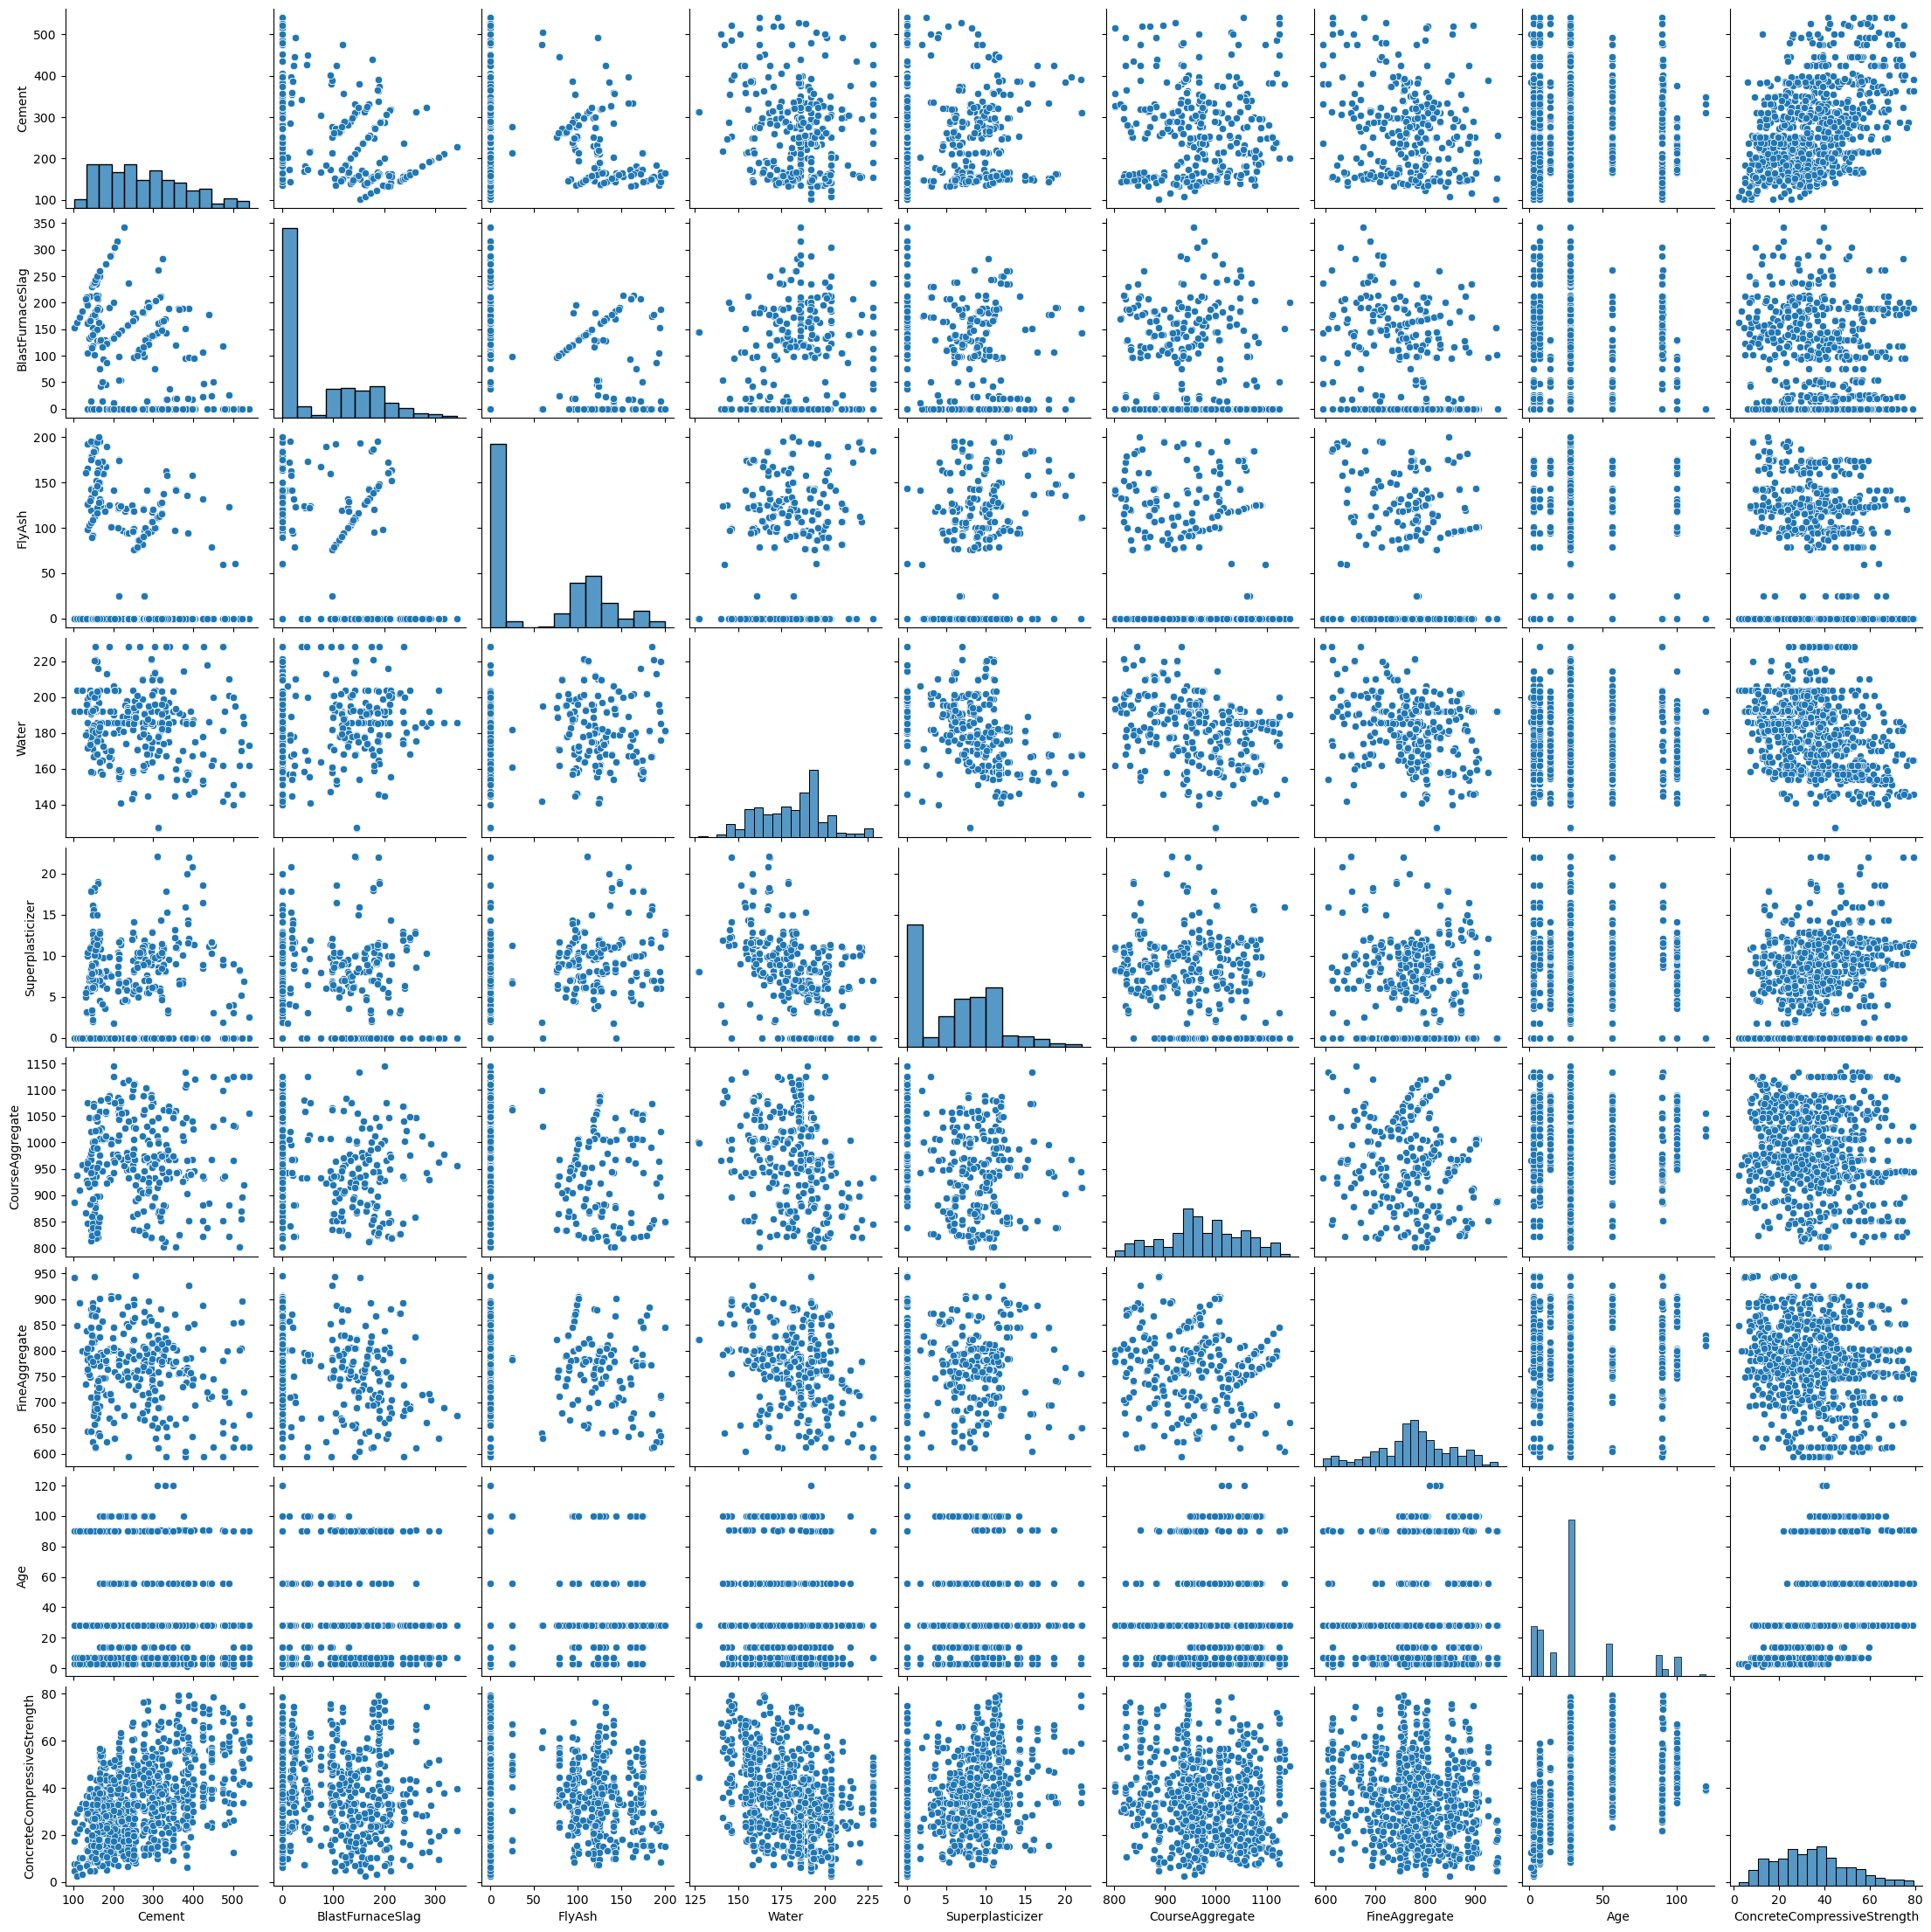

In [26]:
#plot the pair plot
sns.pairplot(df);

### Analysis of Pair Plot: ###

* It is difficult to understand the pair plot because there are a lot of data points. 

---

### C) Residual QQ Plot ###

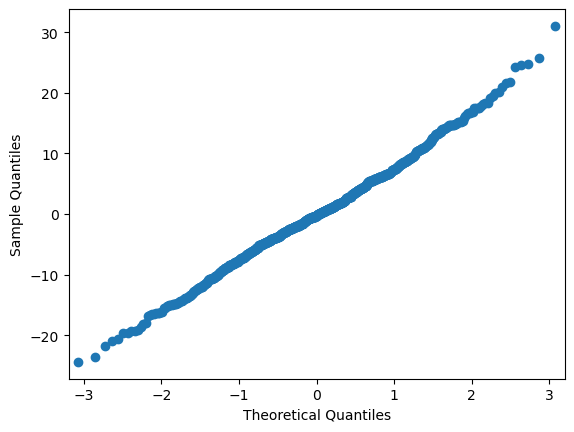

In [27]:
#plot the residual QQ plot
sm.qqplot(multi_linear_model.resid);

### Analysis of Residual QQ Plot: ###

* In the residual QQ plot of the multi-linear regression model, the residuals are normally distributed if they follow a diagonal line, which means that there will be less errors in the model. 
* In the above plot, the residuals follow a diagonal line, which means that they are normally distributed and this will result in few errors occuring in the model. 

---

### D) Leverage Plot ###

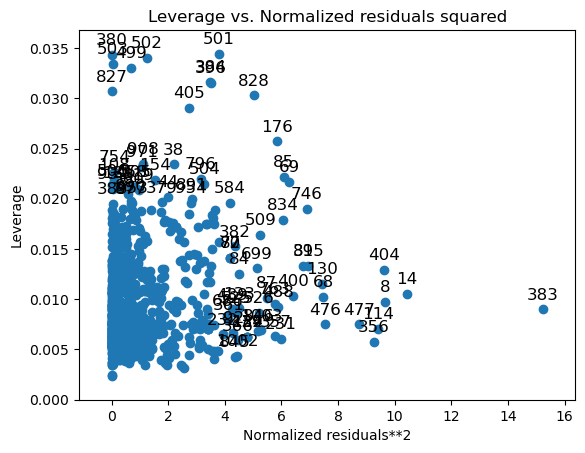

In [28]:
#plot the leverage plot
sm.graphics.plot_leverage_resid2(multi_linear_model, alpha=0.05);

In [29]:
#locate outliers based on the leverage plot
df.loc[[8,14,114,356,380,383,404,405,477,499,501,502,503,827,828]]
#remove outliers & create a new dataframe
new_df = df.drop([5])

In [30]:
#create a new multi-linear regression model 
multi_linear_model = smf.ols(formula='ConcreteCompressiveStrength~Cement+BlastFurnaceSlag+FlyAsh+Water+Superplasticizer+CourseAggregate+FineAggregate+Age', data=new_df).fit()
#print a model summary 
multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.770
Model:                                     OLS   Adj. R-squared:                  0.768
Method:                          Least Squares   F-statistic:                     389.7
Date:                         Wed, 09 Aug 2023   Prob (F-statistic):          5.65e-291
Time:                                 03:06:23   Log-Likelihood:                -3283.1
No. Observations:                          940   AIC:                             6584.
Df Residuals:                              931   BIC:                             6628.
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           49.6077     22.417      2.213      0.027       5.614      93.602
Cement               0.1022      0.007     14.671      0.000       0.089       0.116
BlastFurnaceSlag     0.0757      0.008      9.003      0.000       0.059       0.092
FlyAsh               0.0485      0.010      4.695      0.000       0.028       0.069
Water               -0.2500      0.035     -7.170      0.000      -0.318      -0.182
Superplasticizer     0.2149      0.085      2.521      0.012       0.048       0.382
CourseAggregate     -0.0101      0.008     -1.288      0.198      -0.025       0.005
FineAggregate       -0.0100      0.009     -1.121      0.263      -0.028       0.008
Age                  0.3122      0.009     33.919      0.000       0.294       0.330
==============================================================================
Omnibus:                        8.862   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.278
Skew:                           0.148   Prob(JB):                      0.00586
Kurtosis:                       3.418   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis of Leverage Plot & New Multi-Linear Regression Model: ###

* The leverage plot displayed many outliers which were removed when creating a new data frame. 
* A new multi-linear regression model was created using the new data frame, however, the R-squared value remained the same as before, 0.770. 

---

### E) Interactions ###

In [31]:
#create a new multi-linear regression model  
#use interaction between fly ash + superplasticizer because they have a correlation of 0.38
multi_linear_model = smf.ols(formula='ConcreteCompressiveStrength~Cement+BlastFurnaceSlag+FlyAsh*Superplasticizer+CourseAggregate+FineAggregate+Age+Water', data=new_df).fit()
multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.775
Model:                                     OLS   Adj. R-squared:                  0.772
Method:                          Least Squares   F-statistic:                     355.1
Date:                         Wed, 09 Aug 2023   Prob (F-statistic):          1.08e-293
Time:                                 03:06:24   Log-Likelihood:                -3273.7
No. Observations:                          940   AIC:                             6567.
Df Residuals:                              930   BIC:                             6616.
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  77.8965     23.146      3.365      0.001      32.472     123.321
Cement                      0.0910      0.007     12.353      0.000       0.077       0.105
BlastFurnaceSlag            0.0615      0.009      6.862      0.000       0.044       0.079
FlyAsh                      0.0677      0.011      6.071      0.000       0.046       0.090
Superplasticizer            0.3849      0.093      4.134      0.000       0.202       0.568
FlyAsh:Superplasticizer    -0.0045      0.001     -4.333      0.000      -0.007      -0.002
CourseAggregate            -0.0184      0.008     -2.308      0.021      -0.034      -0.003
FineAggregate              -0.0235      0.009     -2.501      0.013      -0.042      -0.005
Age                         0.3103      0.009     33.999      0.000       0.292       0.328
Water                      -0.2796      0.035     -7.942      0.000      -0.349      -0.211
==============================================================================
Omnibus:                       11.294   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.972
Skew:                           0.160   Prob(JB):                     0.000925
Kurtosis:                       3.504   Cond. No.                     1.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#create a new multi-linear regression model  
#use interaction between age + water because they have a correlation of 0.28
multi_linear_model = smf.ols(formula='ConcreteCompressiveStrength~Cement+BlastFurnaceSlag+FlyAsh+Superplasticizer+CourseAggregate+FineAggregate+Age*Water', data=new_df).fit()
multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.773
Model:                                     OLS   Adj. R-squared:                  0.771
Method:                          Least Squares   F-statistic:                     352.1
Date:                         Wed, 09 Aug 2023   Prob (F-statistic):          2.23e-292
Time:                                 03:06:24   Log-Likelihood:                -3276.8
No. Observations:                          940   AIC:                             6574.
Df Residuals:                              930   BIC:                             6622.
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.6421     22.365      1.907      0.057      -1.249      86.534
Cement               0.1016      0.007     14.668      0.000       0.088       0.115
BlastFurnaceSlag     0.0743      0.008      8.880      0.000       0.058       0.091
FlyAsh               0.0467      0.010      4.538      0.000       0.026       0.067
Superplasticizer     0.2167      0.085      2.558      0.011       0.050       0.383
CourseAggregate     -0.0113      0.008     -1.456      0.146      -0.027       0.004
FineAggregate       -0.0116      0.009     -1.298      0.195      -0.029       0.006
Age                  0.6062      0.083      7.277      0.000       0.443       0.770
Water               -0.1960      0.038     -5.181      0.000      -0.270      -0.122
Age:Water           -0.0016      0.000     -3.551      0.000      -0.003      -0.001
==============================================================================
Omnibus:                       10.763   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.526
Skew:                           0.175   Prob(JB):                      0.00191
Kurtosis:                       3.444   Cond. No.                     6.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#create a new multi-linear regression model  
#use interaction between course aggregate + fine aggregate because they are both aggregates  
multi_linear_model = smf.ols(formula='ConcreteCompressiveStrength~Cement+BlastFurnaceSlag+FlyAsh+Superplasticizer+CourseAggregate*FineAggregate+Age+Water', data=new_df).fit()
multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.772
Model:                                     OLS   Adj. R-squared:                  0.770
Method:                          Least Squares   F-statistic:                     349.9
Date:                         Wed, 09 Aug 2023   Prob (F-statistic):          2.16e-291
Time:                                 03:06:24   Log-Likelihood:                -3279.1
No. Observations:                          940   AIC:                             6578.
Df Residuals:                              930   BIC:                             6627.
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       142.5894     39.727      3.589      0.000      64.625     220.554
Cement                            0.1039      0.007     14.918      0.000       0.090       0.118
BlastFurnaceSlag                  0.0768      0.008      9.150      0.000       0.060       0.093
FlyAsh                            0.0462      0.010      4.470      0.000       0.026       0.066
Superplasticizer                  0.2337      0.085      2.744      0.006       0.067       0.401
CourseAggregate                  -0.1075      0.035     -3.046      0.002      -0.177      -0.038
FineAggregate                    -0.1327      0.044     -2.999      0.003      -0.220      -0.046
CourseAggregate:FineAggregate     0.0001   4.52e-05      2.830      0.005    3.93e-05       0.000
Age                               0.3115      0.009     33.958      0.000       0.293       0.329
Water                            -0.2503      0.035     -7.206      0.000      -0.318      -0.182
==============================================================================
Omnibus:                        7.894   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                9.104
Skew:                           0.134   Prob(JB):                       0.0105
Kurtosis:                       3.400   Cond. No.                     1.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#create a new multi-linear regression model  
#use interaction between fly ash + superplasticizer, age + water, and course + fine aggregates 
multi_linear_model = smf.ols(formula='ConcreteCompressiveStrength~Cement+BlastFurnaceSlag+FlyAsh*Superplasticizer+CourseAggregate*FineAggregate+Age*Water', data=new_df).fit()
multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.780
Model:                                     OLS   Adj. R-squared:                  0.777
Method:                          Least Squares   F-statistic:                     298.7
Date:                         Wed, 09 Aug 2023   Prob (F-statistic):          8.41e-296
Time:                                 03:06:24   Log-Likelihood:                -3262.9
No. Observations:                          940   AIC:                             6550.
Df Residuals:                              928   BIC:                             6608.
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       169.3448     39.750      4.260      0.000      91.335     247.355
Cement                            0.0922      0.007     12.609      0.000       0.078       0.107
BlastFurnaceSlag                  0.0611      0.009      6.886      0.000       0.044       0.079
FlyAsh                            0.0634      0.011      5.724      0.000       0.042       0.085
Superplasticizer                  0.4070      0.092      4.403      0.000       0.226       0.588
FlyAsh:Superplasticizer          -0.0045      0.001     -4.387      0.000      -0.006      -0.002
CourseAggregate                  -0.1228      0.035     -3.524      0.000      -0.191      -0.054
FineAggregate                    -0.1548      0.044     -3.540      0.000      -0.241      -0.069
CourseAggregate:FineAggregate     0.0001   4.45e-05      3.042      0.002    4.81e-05       0.000
Age                               0.6039      0.082      7.348      0.000       0.443       0.765
Water                            -0.2260      0.038     -5.953      0.000      -0.300      -0.151
Age:Water                        -0.0016      0.000     -3.603      0.000      -0.003      -0.001
==============================================================================
Omnibus:                       12.500   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.307
Skew:                           0.180   Prob(JB):                     0.000474
Kurtosis:                       3.511   Cond. No.                     1.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis of Interactions: ###

* Without any interactions, the R-squared value is 0.770. 
* With an interaction between fly ash + superplasticizer, the R-squared value is 0.775. 
* With an interaction between age + water, the R-squared value is 0.773.
* With an interaction between course aggregate + fine aggregate, the R-squared value is 0.772. 
* With an interaction between fly ash + superplasticizer, age + water, and course aggregate + fine aggregate, the R-squared value is 0.780. 

---

### F) Conlusion of Multi-Linear Regression: ###

* Without any interactions, the R-squared value was 0.770. 
* By removing additional outliers using the leverage plot, the R-squared value still remained 0.770. 
* By including interactions between fly ash + superplasticizer, age + water, and course aggregate + fine aggregate, the R-squared value became 0.780. 
* This value is much higher than the R-squared values that were determined for the simple linear regression models. 

---

## 8) Conclusion

* First, the concrete compressive strength dataset was selected and turned into a dataframe, which was then used to understand its samples/features. 
* Next, Data Cleaning and Exploratory Data Analysis was performed on the dataset. This included determining any missing/NaN values and plotting visualizations (such as Boxplots, Histograms and Correlation Matrix) to detect outliers and understand correlations between the features. 
* Then, a Simple Linear Regression model was fit to the dataset but the R-squared values and the Residual QQ Plot determined that it wasn't a good fit. 
* Finally, a Multi-Linear Regression model was fit to the dataset, which proved to be a better fit for the dataset as evidenced by the increase in the R-squared value and the Residual QQ Plot represented residuals as being normally distributed. Upon incorporating interactions into the model, the R-squared value increased as well. 

---

## 9) References

Dataset source: 
* Yeh, I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

Coding sources: 
* https://www.tablesgenerator.com/markdown_tables
* https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
* https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot#:~:text=You%20can%20set%20the%20labels%20on%20that%20object.&text=Or%2C%20more%20succinctly%3A%20ax.,name%2C%20if%20it%20has%20one.
* https://www.statology.org/seaborn-figure-size/
* https://datatofish.com/correlation-matrix-pandas/
* https://www.statology.org/how-to-read-a-correlation-matrix/
* https://www.simplypsychology.org/correlation.html#:~:text=For%20example%2C%20with%20demographic%20data,below%200.45%20are%20considered%20weak.
* https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
* https://sparkbyexamples.com/python/pandas-get-index-from-dataframe/#:~:text=The%20DataFrame%20index%20is%20also,row%20at%20a%20specified%20Index.
* https://www.cement.org/cement-concrete/concrete-materials/aggregates#:~:text=Coarse%20aggregates%20are%20any%20particles,up%20most%20of%20the%20remainder.
